In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
os.environ["QT_QPA_PLATFORM"] = "xcb"

# Question 1

In [ ]:
cat_img = "cat.jpg"

In [ ]:
def imp_gray(img_loc):
  image = cv2.imread(img_loc)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray_image

In [ ]:
cat_image = cv2.imread(cat_img)
cat_gray_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY)
print(cat_gray_image)


[[199 202 205 ... 194 195 199]
 [199 202 205 ... 195 196 200]
 [198 201 204 ... 195 197 202]
 ...
 [136 135 135 ...  59  56  51]
 [135 134 133 ...  57  56  49]
 [134 133 132 ...  54  55  46]]


In [ ]:
flatten_gimg = cat_gray_image.flatten()
print(flatten_gimg)

[199 202 205 ...  54  55  46]


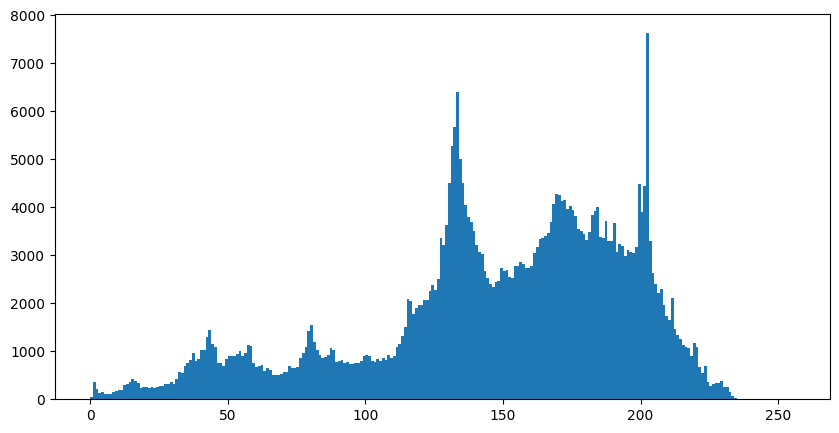

In [ ]:
plt.figure(figsize=(10, 5))
hists = plt.hist(flatten_gimg, bins=256, range=(0, 256))
plt.show()

### Verifying sum of freq = total no. of pixels

In [ ]:
print(np.sum(hists[0]))
print(cat_image.shape)
print(220*220)

409600.0
(640, 640, 3)
48400


# Question 2

# Question 3

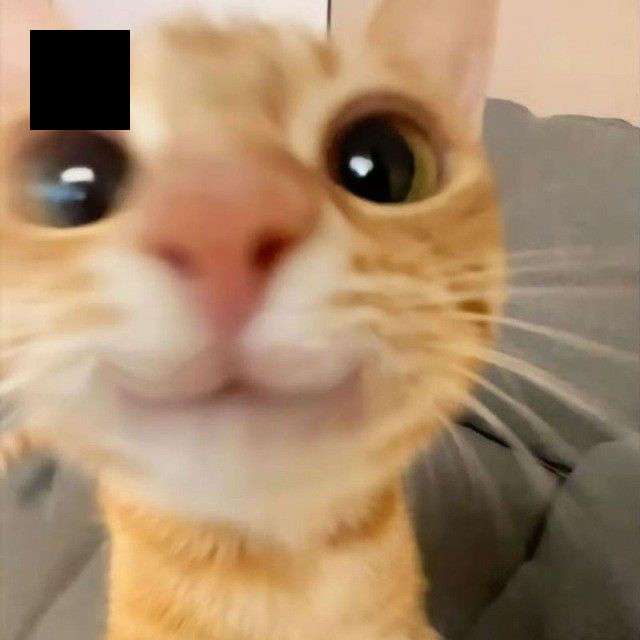

In [ ]:
# This changes ovetr
# image_int = image * 5
# cv2_imshow(image_int)

start_row = 30
start_colm = 30
width = 100

for i in range(start_row, start_row + width):
  for j in range(start_colm, start_colm + width):
    cat_image[i][j] = 0


cv2_imshow(cat_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows() ## comments: added cause it broke on my arch system


In [ ]:
people_img = "people.png"

people_gray = imp_gray(people_img)
print(people_gray)

[[  0   0   0 ...   0   0   0]
 [  0 209 212 ... 244 244   0]
 [  0 211 213 ... 244 245   0]
 ...
 [  0 130 129 ...  56  56   0]
 [  0 130 129 ...  59  58   0]
 [  0   0   0 ...   0   0   0]]


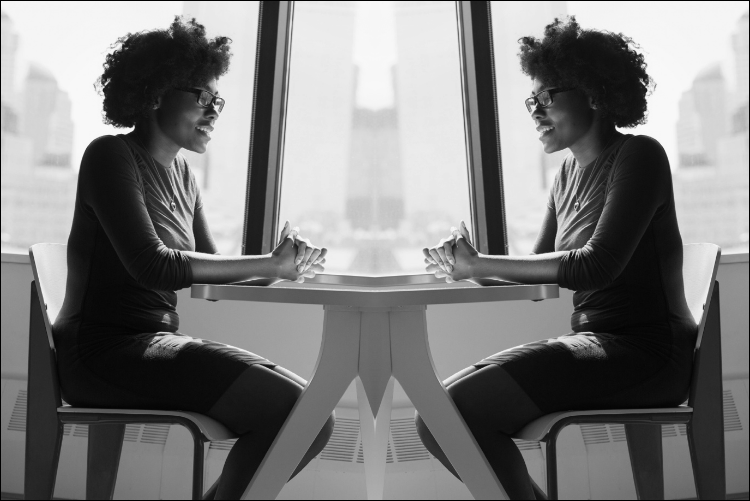

In [ ]:
height, width = people_gray.shape

img_LHS_reflection = people_gray.copy()
img_RHS_reflection = people_gray.copy()
img_center_reflection = people_gray.copy()

for y in range(height):
    for x in range(width // 2):
        img_LHS_reflection[y, x] = people_gray[y, width - 1 - x]

for y in range(height):
    for x in range(width // 2, width):
        img_RHS_reflection[y, x] = people_gray[y, width - 1 - x]

for y in range(height):
    for x in range(width // 2):
        img_center_reflection[y, x] = people_gray[y, width - 1 - x]
        img_center_reflection[y, width - 1 - x] = people_gray[y, x]

# Display the images
cv2_imshow(img_LHS_reflection)
# cv2.waitKey(0)  # Wait forever until a key is pressed
# cv2.destroyAllWindows()



# Question 4

In [ ]:
circle_15cm_filled = "8cm_circle_filled.jpg"
circle_30cm_filled = "30cm_circle_filled.jpg"

In [ ]:
circle_15cm_filled_matrix = cv2.imread(circle_15cm_filled)
circle_30cm_filled_matrix = cv2.imread(circle_30cm_filled)

circle_15cm_filled_gray = cv2.cvtColor(circle_15cm_filled_matrix, cv2.COLOR_BGR2GRAY)
circle_30cm_filled_gray = cv2.cvtColor(circle_30cm_filled_matrix, cv2.COLOR_BGR2GRAY)

print(circle_15cm_filled_gray.shape)
print(circle_30cm_filled_gray.shape)

(2992, 2992)
(1496, 1496)


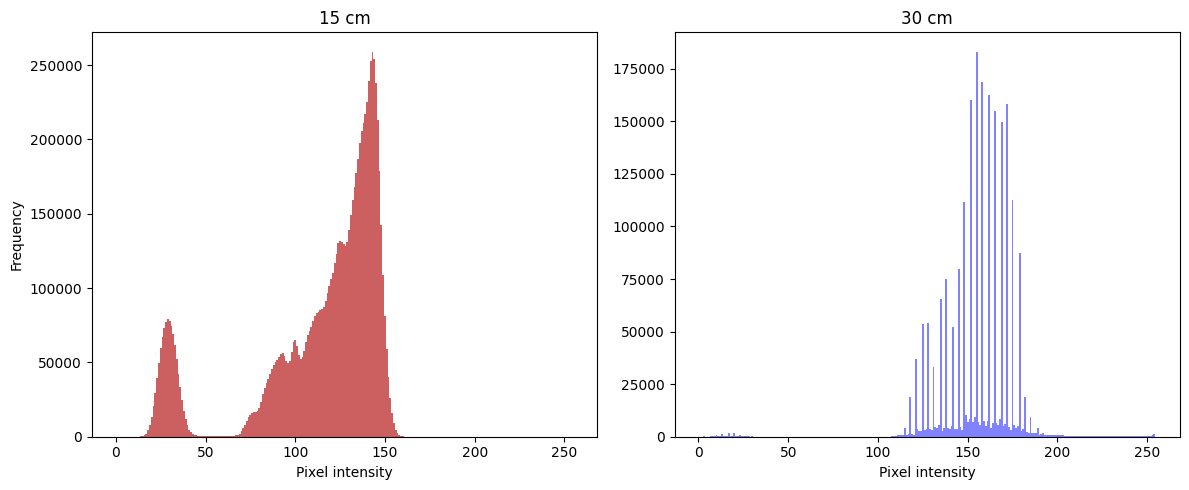

In [ ]:
hist_gray_15cm,_ = np.histogram(circle_15cm_filled_gray, bins=256, range=(0, 256))
hist_gray_30cm,_ = np.histogram(circle_30cm_filled_gray, bins=256, range=(0, 256))

bins = np.arange(256)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(bins, hist_gray_15cm, width=1.0, color="#CC6060")
axes[0].set_title("15 cm")
axes[0].set_xlabel("Pixel intensity")
axes[0].set_ylabel("Frequency")

axes[1].bar(bins, hist_gray_30cm, width=1.0, color="#8082FF")
axes[1].set_title("30 cm")
axes[1].set_xlabel("Pixel intensity")

plt.tight_layout()
plt.show()



In [ ]:
print("Std dev of 15cm", np.std(hist_gray_15cm))
print("Std dev of 30cm", np.std(hist_gray_30cm))

Std dev of 15cm 58574.62158275118
Std dev of 30cm 29849.64804126675


- 15cm is narrow while 30cm is wide. 30cm has more background with variation than 15cm. Thus 30cm having more constrast as it contains more background and vingetting. it will have more standard dev as well

# Question 5

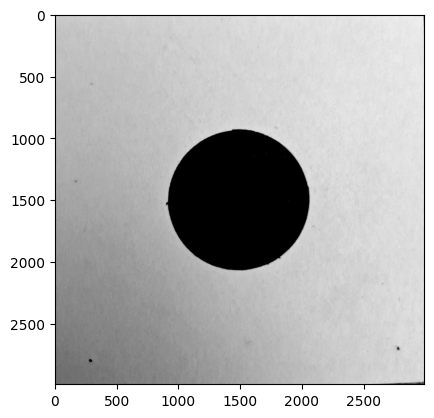

In [ ]:
# Isolating the circle

manual_threshold = 50

thresholed_15cm = []

for i in circle_15cm_filled_gray:
    row = []
    for j in i:
        if j > manual_threshold:
            row.append(j)
        else:
            row.append(0)
    thresholed_15cm.append(row)

plt.imshow(thresholed_15cm,cmap="gray")

In [ ]:
thresholed_15cm = np.array(thresholed_15cm)
np.shape(thresholed_15cm)

(2992, 2992)

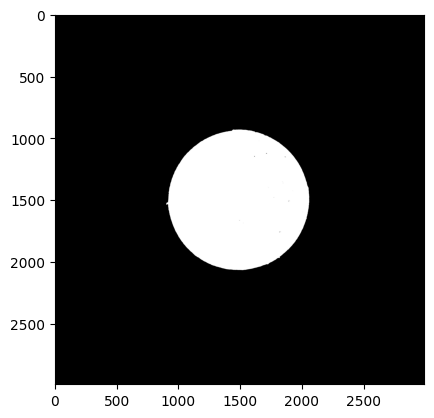

In [ ]:
start_pixel = 700
end_pixel = 700
width = 1500

isolated_circle_15cm = np.zeros(np.shape(thresholed_15cm), dtype=thresholed_15cm.dtype)

for i in range(start_pixel, start_pixel + width):
    for j in range(end_pixel, end_pixel + width):
        if thresholed_15cm[i, j] < 50:
            isolated_circle_15cm[i, j] = 255

plt.imshow(isolated_circle_15cm, cmap="gray")
plt.show()

In [ ]:
# get area of the circle

circle_pixels = 0

for i in isolated_circle_15cm:
    for j in i:
        if j != 0:
            circle_pixels += 1

r = np.sqrt(circle_pixels/np.pi) # pixels
"""
Actual Radius = 1.35cm
2992pixel = 7.5cm
"""
print("pixel radius =",r)

multiplier = 7.5/2992 # cm/pixels
radius = multiplier * r # cm

print("Actual Radius in cm =",radius)


print(2*radius)

pixel radius = 567.069754244368
Actual Radius in cm = 1.4214649588344788
2.8429299176689575


In [ ]:
actual_radius = 1.35
image_radius = radius
distance = 8/2


f = (actual_radius*distance)/image_radius
print("Focal Length in mm =",f*10)

Focal Length in mm = 37.98897726207543


In [ ]:
# @title
new_hist, _ = np.histogram(thresholed_15cm, bins=256, range=(0, 256))
print(new_hist)
plt.bar(bins, new_hist, width=1.0, color="#CC6060")
plt.show()


plt.bar(bins, [i if i > np.mean(new_hist) else 0 for i in new_hist] , width=1.0, color="#CC6060")
plt.show()